In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
path = "your path" # path - путь к файлу

##### housing - исходные данные

In [3]:
housing = pd.read_csv(path + "housing.csv") # Фрейм с данными
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


<AxesSubplot:xlabel='longitude', ylabel='latitude'>

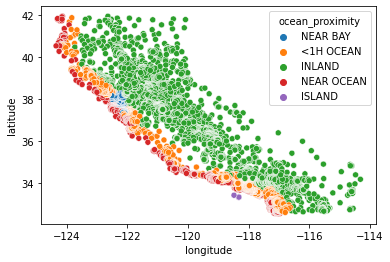

In [4]:
sns.scatterplot(data=housing, x=housing.longitude, y=housing.latitude, hue="ocean_proximity")
# Отображение данных относительно расстояния до океана

### Оценка исходных данных

In [5]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [6]:
housing.describe(include='number')

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [7]:
housing.describe(exclude='number')

,ocean_proximity
count,20640
unique,5
top,<1H OCEAN
freq,9136


In [8]:
housing.ocean_proximity.value_counts()
# Распределение данных по категориям

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [9]:
housing.ocean_proximity = housing.ocean_proximity.astype('category')

<AxesSubplot:ylabel='ocean_proximity'>

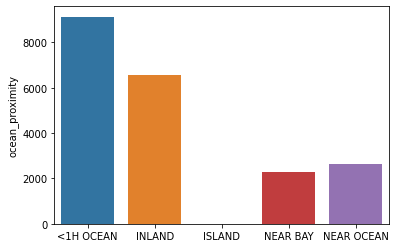

In [10]:
sns.barplot(x=housing.ocean_proximity.value_counts().index, y=housing.ocean_proximity.value_counts(), )

In [11]:
housing.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

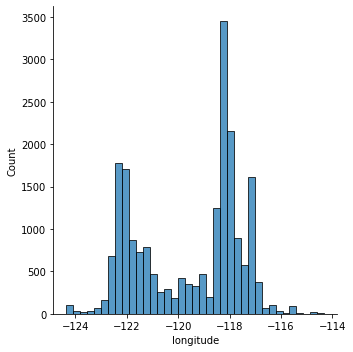

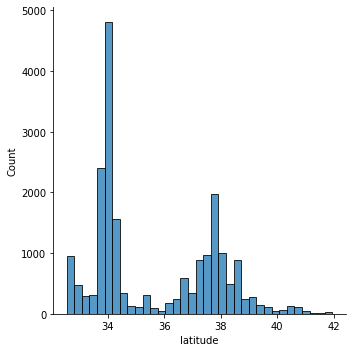

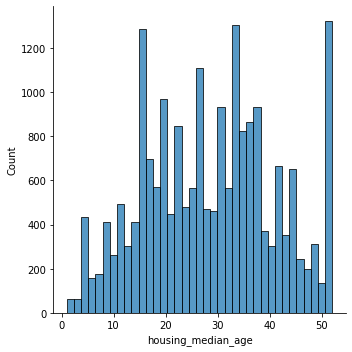

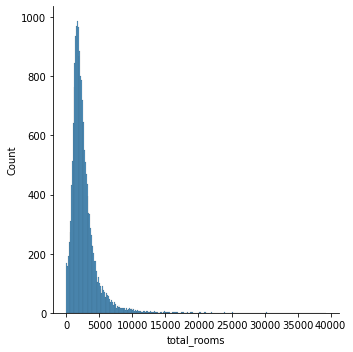

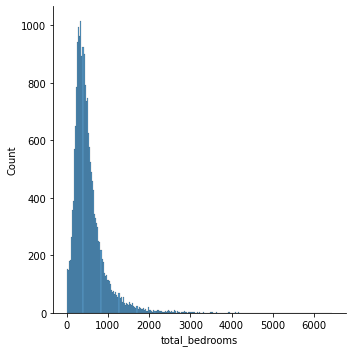

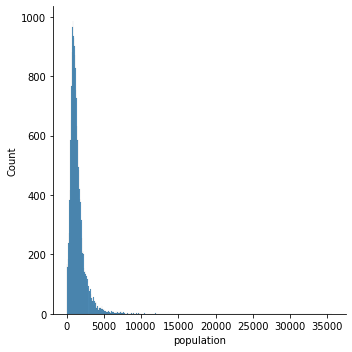

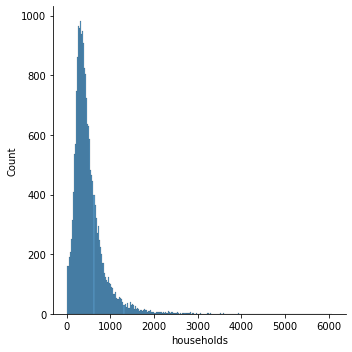

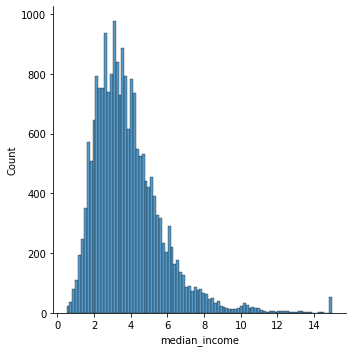

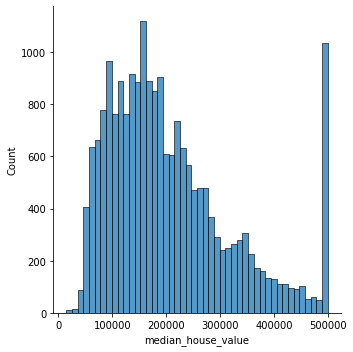

In [12]:
for col in housing.columns[:-1]:
    sns.displot(data=housing[col])

In [13]:
# Сделаем стратифицированный отбор исходя из среднего дохода(как категория)
housing["income_cat"] = pd.cut(housing.median_income, bins=[0, 1.5, 3, 4.5, 6, np.inf],
                              labels=[1, 2, 3, 4, 5])

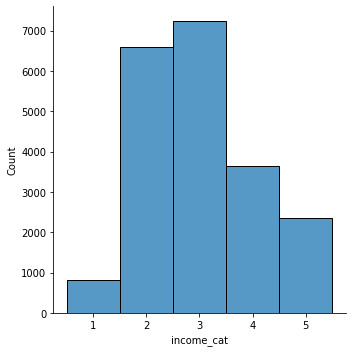

In [14]:
sns.displot(data=housing.income_cat)

In [15]:
from sklearn.model_selection import StratifiedShuffleSplit

In [16]:
splitter = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_idx, test_idx in splitter.split(housing, housing.income_cat):
    train_set = housing.iloc[train_idx]
    test_set = housing.iloc[test_idx]

In [17]:
# После отбора удалим категорию income_cat
for set_ in (train_set, test_set):
    set_.drop("income_cat", axis=1, inplace=True)

C:\Users\Nariman\AppData\Local\Temp\ipykernel_4028\4240981243.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  set_.drop("income_cat", axis=1, inplace=True)
C:\Users\Nariman\AppData\Local\Temp\ipykernel_4028\4240981243.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  set_.drop("income_cat", axis=1, inplace=True)


In [18]:
housing = train_set.copy()

In [19]:
# вычислим коэффицент корреляции для выявления линейных связей.
housing.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924478,-0.105823,0.048909,0.076686,0.108071,0.063146,-0.019615,-0.047466
latitude,-0.924478,1.000000,0.005737,-0.039245,-0.072550,-0.115290,-0.077765,-0.075146,-0.142673
housing_median_age,-0.105823,0.005737,1.000000,-0.364535,-0.325101,-0.298737,-0.306473,-0.111315,0.114146
total_rooms,0.048909,-0.039245,-0.364535,1.000000,0.929391,0.855103,0.918396,0.200133,0.135140
total_bedrooms,0.076686,-0.072550,-0.325101,0.929391,1.000000,0.876324,0.980167,-0.009643,0.047781
population,0.108071,-0.115290,-0.298737,0.855103,0.876324,1.000000,0.904639,0.002421,-0.026882
households,0.063146,-0.077765,-0.306473,0.918396,0.980167,0.904639,1.000000,0.010869,0.064590
median_income,-0.019615,-0.075146,-0.111315,0.200133,-0.009643,0.002421,0.010869,1.000000,0.687151
median_house_value,-0.047466,-0.142673,0.114146,0.135140,0.047781,-0.026882,0.064590,0.687151,1.000000


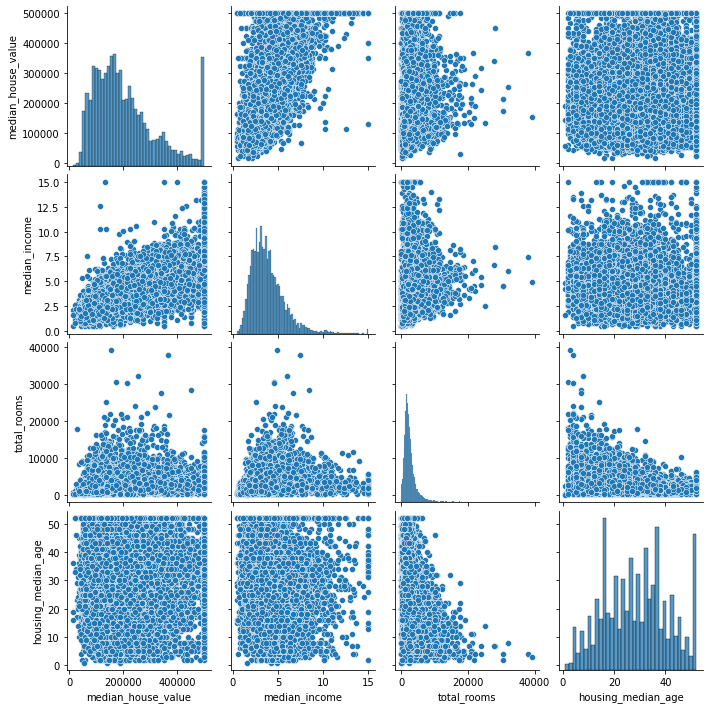

In [20]:
attrib = ["median_house_value", "median_income", "total_rooms", "housing_median_age"]
sns.pairplot(data=housing[attrib])

<AxesSubplot:xlabel='median_income', ylabel='median_house_value'>

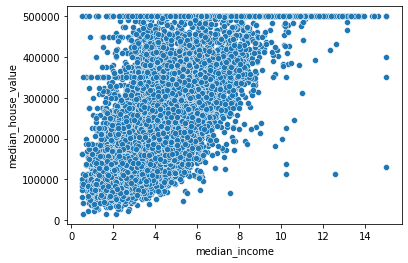

In [21]:
#Видна линейная связь между median_income и median_house_value, что подтерждает корр. матрица
sns.scatterplot(x=housing.median_income, y=housing.median_house_value)

In [22]:
# Добавим взаимодействия между атрибутами
housing["rooms_households"] = housing.total_rooms / housing.households
housing["bedrooms_rooms"] = housing.total_bedrooms / housing.total_rooms
housing["pop_household"] = housing.population / housing.households

In [23]:
# Проверим корреляцию
housing.corr()["median_house_value"]

longitude            -0.047466
latitude             -0.142673
housing_median_age    0.114146
total_rooms           0.135140
total_bedrooms        0.047781
population           -0.026882
households            0.064590
median_income         0.687151
median_house_value    1.000000
rooms_households      0.146255
bedrooms_rooms       -0.259952
pop_household        -0.021991
Name: median_house_value, dtype: float64

In [24]:
housing_labels = housing.median_house_value.copy()
housing = housing.drop("median_house_value", axis=1)

In [25]:
from sklearn.impute import SimpleImputer

In [26]:
imputer = SimpleImputer(strategy='median')
num_attribs = housing.drop("ocean_proximity", axis=1)
cat_attribs = housing.ocean_proximity.copy()

In [27]:
imputer.fit(num_attribs)

SimpleImputer(strategy='median')

In [28]:
imputer.statistics_

array([-1.18510000e+02,  3.42600000e+01,  2.90000000e+01,  2.11900000e+03,
        4.33000000e+02,  1.16400000e+03,  4.08000000e+02,  3.54155000e+00,
        5.23234164e+00,  2.03027043e-01,  2.81766108e+00])

In [29]:
cols = num_attribs.columns
X = imputer.transform(num_attribs)

In [30]:
housing = pd.DataFrame(data=X, columns=cols, index=num_attribs.index)
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_households,bedrooms_rooms,pop_household
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,5.485836,0.205784,3.168555
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,6.927083,0.160714,2.623698
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750,5.393333,0.191595,2.223333
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,3.886128,0.276505,1.859213
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,6.096552,0.182692,3.167241


In [31]:
from sklearn.preprocessing import OneHotEncoder

In [32]:
one_hot_encoder = OneHotEncoder(sparse=False)

In [33]:
housing_one_hot = one_hot_encoder.fit_transform(pd.DataFrame(cat_attribs))

In [34]:
housing_one_hot

array([[0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [35]:
housing_one_hot = pd.DataFrame(housing_one_hot, columns=one_hot_encoder.categories_, index=num_attribs.index)

In [36]:
housing = pd.merge(housing, housing_one_hot, left_index=True, right_index=True)

In [37]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_households,bedrooms_rooms,pop_household,"(<1H OCEAN,)","(INLAND,)","(ISLAND,)","(NEAR BAY,)","(NEAR OCEAN,)"
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,5.485836,0.205784,3.168555,0.0,1.0,0.0,0.0,0.0
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,6.927083,0.160714,2.623698,0.0,0.0,0.0,0.0,1.0
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750,5.393333,0.191595,2.223333,0.0,1.0,0.0,0.0,0.0
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,3.886128,0.276505,1.859213,0.0,0.0,0.0,0.0,1.0
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,6.096552,0.182692,3.167241,1.0,0.0,0.0,0.0,0.0


In [38]:
from sklearn.preprocessing import StandardScaler

In [39]:
std_scaler = StandardScaler().fit(housing)

E:\Education\Probability_Statistic\statistic_env\lib\site-packages\sklearn\utils\validation.py:1854: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(


In [40]:
housing = pd.DataFrame(std_scaler.transform(housing), index=housing.index, columns=housing.columns)

E:\Education\Probability_Statistic\statistic_env\lib\site-packages\sklearn\utils\validation.py:1854: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(


In [41]:
from sklearn.linear_model import LinearRegression

In [41]:
lin_mod = LinearRegression()
lin_mod.fit(housing, housing_labels)

E:\Education\Probability_Statistic\statistic_env\lib\site-packages\sklearn\utils\validation.py:1854: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(


LinearRegression()

In [58]:
some_data = housing.iloc[:5]
pred = lin_mod.predict(some_data)
print("TRUE: {}".format(housing_labels.iloc[:5].values))
print("PRED: {}".format(pred))

TRUE: [ 72100. 279600.  82700. 112500. 238300.]
PRED: [ 83352.92512474 306568.92512474 150360.92512474 189192.92512474
 241528.92512474]


E:\Education\Probability_Statistic\statistic_env\lib\site-packages\sklearn\utils\validation.py:1854: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(


In [42]:
from sklearn.metrics import mean_squared_error

In [64]:
lin_pred = lin_mod.predict(housing)
res = mean_squared_error(housing_labels.values, lin_pred)
np.sqrt(res)

E:\Education\Probability_Statistic\statistic_env\lib\site-packages\sklearn\utils\validation.py:1854: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(


68167.57684715789

In [42]:
from sklearn.tree import DecisionTreeRegressor

In [63]:
tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing, housing_labels)

E:\Education\Probability_Statistic\statistic_env\lib\site-packages\sklearn\utils\validation.py:1854: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(


DecisionTreeRegressor()

In [66]:
tree_pred = tree_reg.predict(housing)
res = mean_squared_error(housing_labels, tree_pred)
res

E:\Education\Probability_Statistic\statistic_env\lib\site-packages\sklearn\utils\validation.py:1854: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(


0.0

In [43]:
from sklearn.model_selection import cross_val_score

In [71]:
cross_val_10 = cross_val_score(tree_reg, housing, housing_labels, scoring="neg_root_mean_squared_error", cv=10)
print(cross_val_10)

E:\Education\Probability_Statistic\statistic_env\lib\site-packages\sklearn\utils\validation.py:1854: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
E:\Education\Probability_Statistic\statistic_env\lib\site-packages\sklearn\utils\validation.py:1854: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
E:\Education\Probability_Statistic\statistic_env\lib\site-packages\sklearn\utils\validation.py:1854: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
E:\Education\Probability_Statistic\statistic_env\lib\site-packages\sklearn\utils\validation.py:1854: FutureWarning: Feature names only support names that are all strings. Got feature names with

[-74181.77591571 -71576.78072038 -69320.96971659 -72566.42722074
 -68508.31401602 -75396.01788363 -69988.92777048 -70848.99960339
 -69579.78518768 -70916.68955427]


E:\Education\Probability_Statistic\statistic_env\lib\site-packages\sklearn\utils\validation.py:1854: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(


In [72]:
def sc(scs):
    print("SCORES: {}".format(scs))
    print("MEAN: {}".format(scs.mean()))
    print("STD: {}".format(scs.std()))

In [73]:
sc(-cross_val_10)

SCORES: [74181.77591571 71576.78072038 69320.96971659 72566.42722074
 68508.31401602 75396.01788363 69988.92777048 70848.99960339
 69579.78518768 70916.68955427]
MEAN: 71288.46875889055
STD: 2085.6548096871898


In [74]:
cros_val_10_lin = cross_val_score(lin_mod, housing, housing_labels, scoring='neg_root_mean_squared_error', cv=10)

E:\Education\Probability_Statistic\statistic_env\lib\site-packages\sklearn\utils\validation.py:1854: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
E:\Education\Probability_Statistic\statistic_env\lib\site-packages\sklearn\utils\validation.py:1854: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
E:\Education\Probability_Statistic\statistic_env\lib\site-packages\sklearn\utils\validation.py:1854: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
E:\Education\Probability_Statistic\statistic_env\lib\site-packages\sklearn\utils\validation.py:1854: FutureWarning: Feature names only support names that are all strings. Got feature names with

In [75]:
sc(-cros_val_10_lin)

SCORES: [71182.87696736 63834.66909298 67729.4492521  68254.7496261
 66720.52815466 72239.8866404  70041.14105769 68451.38914525
 65966.62908989 70138.49347871]
MEAN: 68455.98125051221
STD: 2413.11087491115


In [44]:
from sklearn.ensemble import RandomForestRegressor

In [77]:
rnd_reg = RandomForestRegressor(random_state=42)
rnd_reg.fit(housing, housing_labels)

E:\Education\Probability_Statistic\statistic_env\lib\site-packages\sklearn\utils\validation.py:1854: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(


RandomForestRegressor(random_state=42)

In [78]:
rnd_pred = rnd_reg.predict(housing)

E:\Education\Probability_Statistic\statistic_env\lib\site-packages\sklearn\utils\validation.py:1854: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(


In [79]:
mean_squared_error(housing_labels, rnd_pred, squared=False)

18643.965321178945

In [80]:
rnd_preds = cross_val_score(rnd_reg, housing, housing_labels, cv=10, scoring="neg_root_mean_squared_error")

E:\Education\Probability_Statistic\statistic_env\lib\site-packages\sklearn\utils\validation.py:1854: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
E:\Education\Probability_Statistic\statistic_env\lib\site-packages\sklearn\utils\validation.py:1854: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
E:\Education\Probability_Statistic\statistic_env\lib\site-packages\sklearn\utils\validation.py:1854: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
E:\Education\Probability_Statistic\statistic_env\lib\site-packages\sklearn\utils\validation.py:1854: FutureWarning: Feature names only support names that are all strings. Got feature names with

In [81]:
sc(-rnd_preds)

SCORES: [51468.67431659 48558.10945101 46944.27789502 51886.63016622
 47662.87497687 51383.51857789 52459.08101362 50123.08324218
 48713.72491549 54195.07949047]
MEAN: 50339.50540453655
STD: 2206.1714766286996


In [45]:
from sklearn.svm import SVR

In [88]:
svm_reg = SVR()
svm_reg.fit(housing, housing_labels)

E:\Education\Probability_Statistic\statistic_env\lib\site-packages\sklearn\utils\validation.py:1854: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(


SVR()

In [89]:
svm_pred = svm_reg.predict(housing)
mean_squared_error(housing_labels, svm_pred, squared=False)

E:\Education\Probability_Statistic\statistic_env\lib\site-packages\sklearn\utils\validation.py:1854: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(


118484.31717644096

In [90]:
svm_preds = cross_val_score(svm_reg, housing, housing_labels, scoring="neg_root_mean_squared_error", cv=10)

E:\Education\Probability_Statistic\statistic_env\lib\site-packages\sklearn\utils\validation.py:1854: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
E:\Education\Probability_Statistic\statistic_env\lib\site-packages\sklearn\utils\validation.py:1854: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
E:\Education\Probability_Statistic\statistic_env\lib\site-packages\sklearn\utils\validation.py:1854: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
E:\Education\Probability_Statistic\statistic_env\lib\site-packages\sklearn\utils\validation.py:1854: FutureWarning: Feature names only support names that are all strings. Got feature names with

In [91]:
sc(-svm_preds)

SCORES: [116649.21022349 120044.58822522 113855.71246994 120306.25517806
 114632.21168402 122706.49245666 119771.59637274 118205.47178338
 120189.90128106 118764.36472989]
MEAN: 118512.58044044618
STD: 2606.247912966217


In [46]:
from sklearn.model_selection import GridSearchCV

In [47]:
param_grid = [
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]

forest_reg = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(estimator=forest_reg, param_grid=param_grid, cv=3, scoring="neg_mean_squared_error",
                          return_train_score=True)
grid_search.fit(housing, housing_labels)

E:\Education\Probability_Statistic\statistic_env\lib\site-packages\sklearn\utils\validation.py:1854: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
E:\Education\Probability_Statistic\statistic_env\lib\site-packages\sklearn\utils\validation.py:1854: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
E:\Education\Probability_Statistic\statistic_env\lib\site-packages\sklearn\utils\validation.py:1854: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
E:\Education\Probability_Statistic\statistic_env\lib\site-packages\sklearn\utils\validation.py:1854: FutureWarning: Feature names only support names that are all strings. Got feature names with

E:\Education\Probability_Statistic\statistic_env\lib\site-packages\sklearn\utils\validation.py:1854: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
E:\Education\Probability_Statistic\statistic_env\lib\site-packages\sklearn\utils\validation.py:1854: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
E:\Education\Probability_Statistic\statistic_env\lib\site-packages\sklearn\utils\validation.py:1854: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
E:\Education\Probability_Statistic\statistic_env\lib\site-packages\sklearn\utils\validation.py:1854: FutureWarning: Feature names only support names that are all strings. Got feature names with

E:\Education\Probability_Statistic\statistic_env\lib\site-packages\sklearn\utils\validation.py:1854: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
E:\Education\Probability_Statistic\statistic_env\lib\site-packages\sklearn\utils\validation.py:1854: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
E:\Education\Probability_Statistic\statistic_env\lib\site-packages\sklearn\utils\validation.py:1854: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
E:\Education\Probability_Statistic\statistic_env\lib\site-packages\sklearn\utils\validation.py:1854: FutureWarning: Feature names only support names that are all strings. Got feature names with

E:\Education\Probability_Statistic\statistic_env\lib\site-packages\sklearn\utils\validation.py:1854: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
E:\Education\Probability_Statistic\statistic_env\lib\site-packages\sklearn\utils\validation.py:1854: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
E:\Education\Probability_Statistic\statistic_env\lib\site-packages\sklearn\utils\validation.py:1854: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
E:\Education\Probability_Statistic\statistic_env\lib\site-packages\sklearn\utils\validation.py:1854: FutureWarning: Feature names only support names that are all strings. Got feature names with

E:\Education\Probability_Statistic\statistic_env\lib\site-packages\sklearn\utils\validation.py:1854: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
E:\Education\Probability_Statistic\statistic_env\lib\site-packages\sklearn\utils\validation.py:1854: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
E:\Education\Probability_Statistic\statistic_env\lib\site-packages\sklearn\utils\validation.py:1854: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
E:\Education\Probability_Statistic\statistic_env\lib\site-packages\sklearn\utils\validation.py:1854: FutureWarning: Feature names only support names that are all strings. Got feature names with

GridSearchCV(cv=3, estimator=RandomForestRegressor(random_state=42),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [48]:
grid_search.best_params_

{'max_features': 6, 'n_estimators': 30}

In [49]:
grid_search.best_estimator_

RandomForestRegressor(max_features=6, n_estimators=30, random_state=42)

In [50]:
np.sqrt(-grid_search.best_score_)

50352.27110322977

In [51]:
pd.DataFrame(grid_search.cv_results_).iloc[8]

mean_fit_time                                         9.83022
std_fit_time                                         1.685789
mean_score_time                                      0.228486
std_score_time                                       0.214934
param_max_features                                          6
param_n_estimators                                         30
param_bootstrap                                           NaN
params                {'max_features': 6, 'n_estimators': 30}
split0_test_score                          -2460937074.392426
split1_test_score                          -2535988013.337201
split2_test_score                          -2609128528.029816
mean_test_score                            -2535351205.253148
std_test_score                                60500583.337092
rank_test_score                                             1
split0_train_score                          -390030963.791222
split1_train_score                          -387087520.247277
split2_t

In [52]:
np.sqrt(-pd.DataFrame(grid_search.cv_results_).iloc[8]["mean_test_score"])

50352.27110322977

In [56]:
final_model = grid_search.best_estimator_
y_test = test_set.median_house_value.copy()
X_test = test_set.drop("median_house_value", axis=1)
X_test["rooms_households"] = X_test.total_rooms / X_test.households
X_test["bedrooms_rooms"] = X_test.total_bedrooms / X_test.total_rooms
X_test["pop_household"] = X_test.population / X_test.households
X_test_cat = X_test.ocean_proximity.copy()
X_test_num = X_test.drop("ocean_proximity", axis=1)
X_test_num = imputer.transform(X_test_num)
X_test_cat = one_hot_encoder.transform(pd.DataFrame(X_test_cat))
X_test = np.concatenate([X_test_num, X_test_cat], axis=1)
X_test = std_scaler.transform(X_test)
fin_pred = final_model.predict(X_test)


In [57]:
np.sqrt(mean_squared_error(y_test.values, fin_pred))

47381.57931049578

In [59]:
from scipy import stats

In [60]:
confidence = 0.95
squared_errors = (fin_pred - y_test.values) ** 2
np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1,
                         loc=squared_errors.mean(),
                         scale=stats.sem(squared_errors)))

array([45433.88696887, 49252.30990333])